# EE 386 Digital Signal Processing Lab
## Experiment 4

In [1]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [3]:
#Roll number: 191EE114
alpha = 1 + 114 % 3  
print(alpha)

1


#### Problem 1

In [4]:
# Question 1
t = np.arange(0,2,1/120)
y = np.sin(2*pi*15*t)

Text(0, 0.5, 'Amplitude')

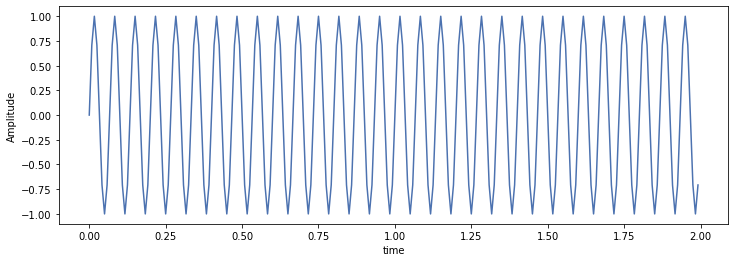

In [5]:
plt.figure(figsize = (12,4))
plt.plot(t,y, label = " Generated signal" )
plt.xlabel("time")
plt.ylabel('Amplitude')

In [6]:
## Function for plotting the magnitude of DFT
def plotMagnitudeDFT(x, Fs, samples=None, Label = None, color = None, normalized = False):
    if samples == None:
        C = int(len(x) / 2)
    else:
        C = samples
    X = np.abs(np.fft.fft(x[0:C]))
    N = Fs * np.arange(0, C) / len(X);
    X_norm = X
    if normalized:
        X_norm = (1/C) * X;
    if color == None:
        plt.stem(N, X_norm, label = Label)
    else:
        plt.stem(N, X_norm, color, label = Label)
    if Label:
        plt.legend(loc = 'upper right')
    return N, X_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


15


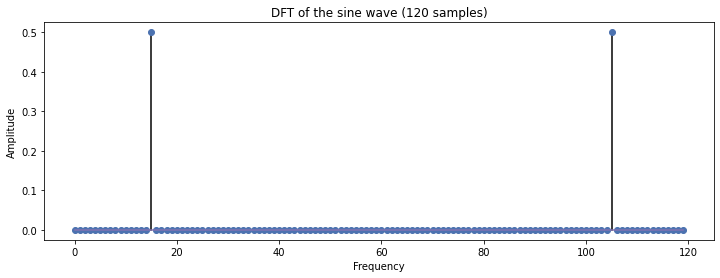

In [7]:
plt.figure(figsize = (12,4))
plt.title("DFT of the sine wave (120 samples)")
N, Y= plotMagnitudeDFT(y, Fs = 120, samples= 120, color= "k", normalized = True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print(np.argmax(Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


Text(0.5, 0, 'Frequency')

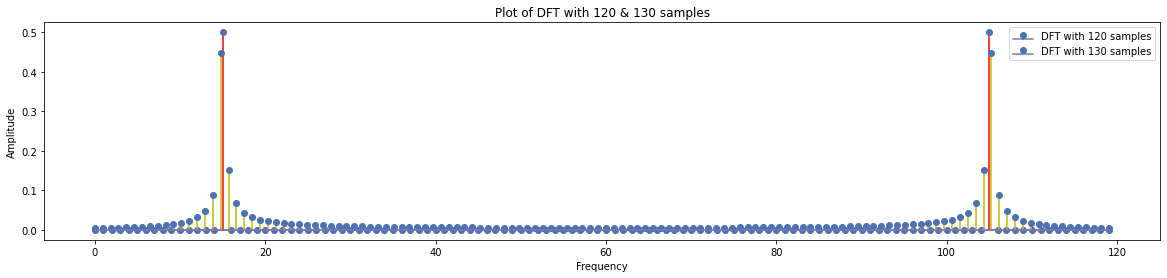

In [8]:
plt.figure(figsize = (20,4))
plt.title("Plot of DFT with 120 & 130 samples")


N, _= plotMagnitudeDFT(y, Fs = 120, samples = 120,normalized= True, color = 'r', Label = "DFT with 120 samples")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")

N, _= plotMagnitudeDFT(y, Fs = 120,samples = 130,normalized= True, color='y', Label = "DFT with 130 samples")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


Text(0.5, 0, 'Frequency')

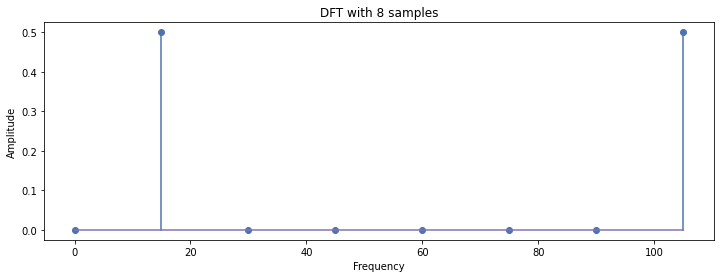

In [9]:
plt.figure(figsize = (12,4))
plt.title("DFT with 8 samples")

N, _= plotMagnitudeDFT(y, Fs = 120, samples = 8,normalized= True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")

#### Problem 2

In [10]:
A = 120
B = 126
Fs = 200
t = np.arange(0,10,1/Fs)
x = 0.1 * np.sin(A * pi * t) + np.cos(B * pi * t)

In [11]:
print("Total number of Samples:",Fs*10)

Total number of Samples: 2000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of 

Text(0.5, 0, 'Frequency')

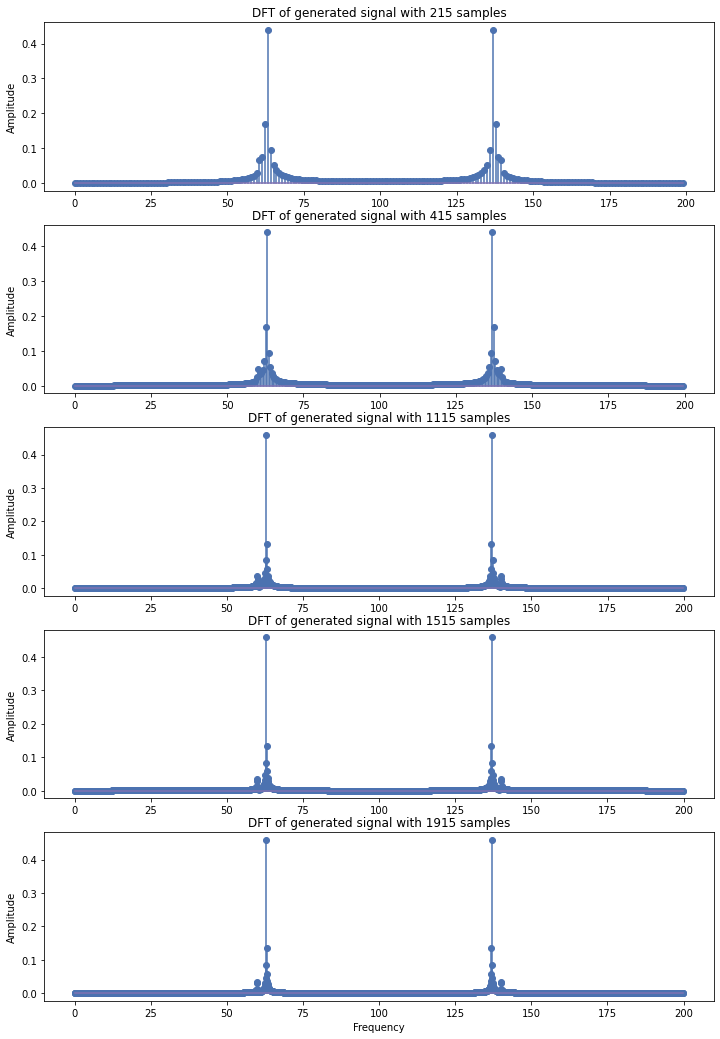

In [13]:
plt.figure(figsize = (12,18))
samples = [215, 415, 1115, 1515, 1915]
for i in range(5):
  plt.subplot(5,1,i+1)
  plt.title("DFT of generated signal with " + str(samples[i]) + " samples")
  N,_ = plotMagnitudeDFT(x, Fs = 200,samples = samples[i], normalized= True)
  plt.ylabel("Amplitude")

plt.xlabel("Frequency")

#### Problem 3

Text(0, 0.5, 'Amplitude')

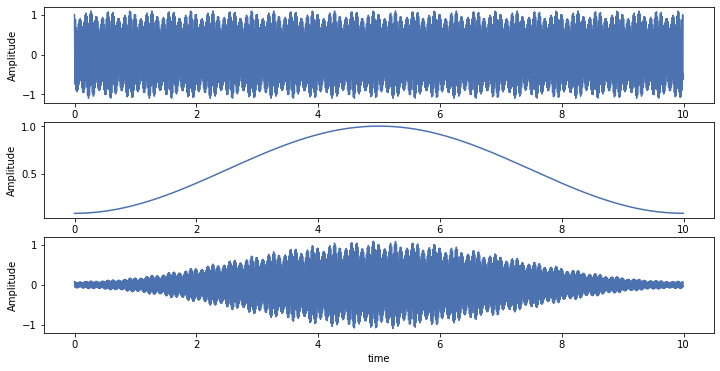

In [14]:
t = np.arange(0,10,1/Fs)
ham = scipy.signal.get_window("hamming", 2000)

Y = np.multiply(x, ham)
plt.subplot(3,1,1)
plt.plot(t, x)
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(t, ham)
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(t, Y)
plt.xlabel('time')
plt.ylabel('Amplitude')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of 

Text(0.5, 0, 'Frequency')

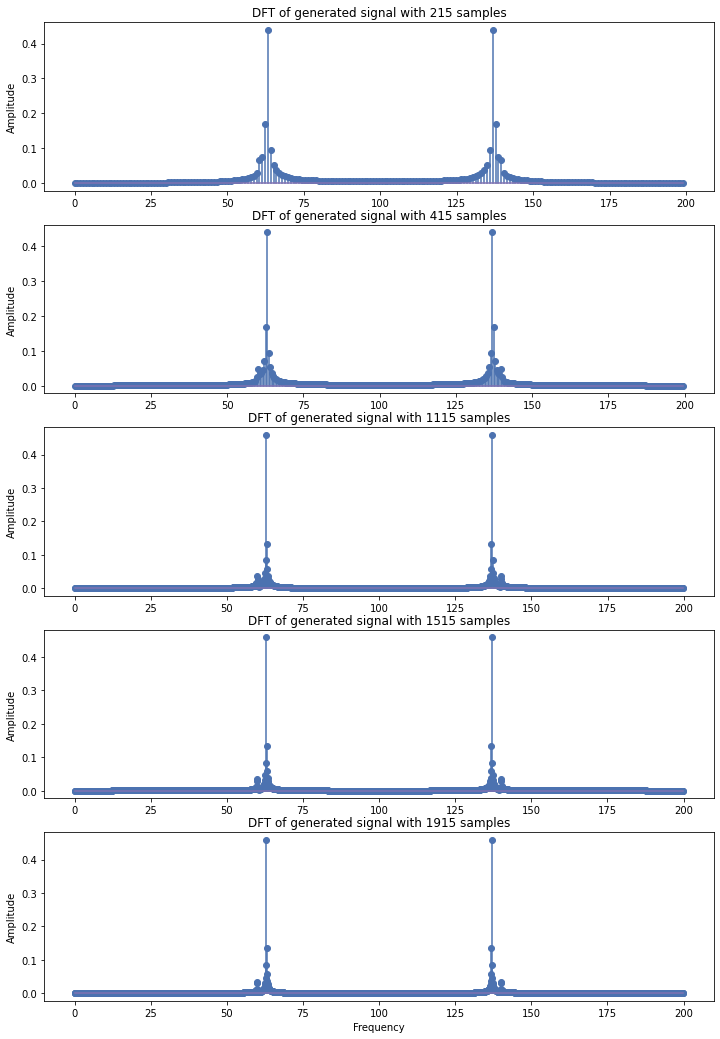

In [17]:
plt.figure(figsize = (12,18))
samples = [215, 415, 1115, 1515, 1915]
for i in range(5):
  plt.subplot(5,1,i+1)
  plt.title("DFT of generated signal with " + str(samples[i]) + " samples")
  N,_ = plotMagnitudeDFT(x, Fs = 200,samples = samples[i], normalized= True)
  plt.ylabel("Amplitude")

plt.xlabel("Frequency")

#### Problem 4

In [21]:
data = np.loadtxt("Exp4Data2.txt", delimiter = ',')
print("Number of samples:",data.shape)


ham = sp.get_window('hamming',500)
window = np.multiply(data, ham)

Number of samples: (500,)


Text(0.5, 0, 'Samples')

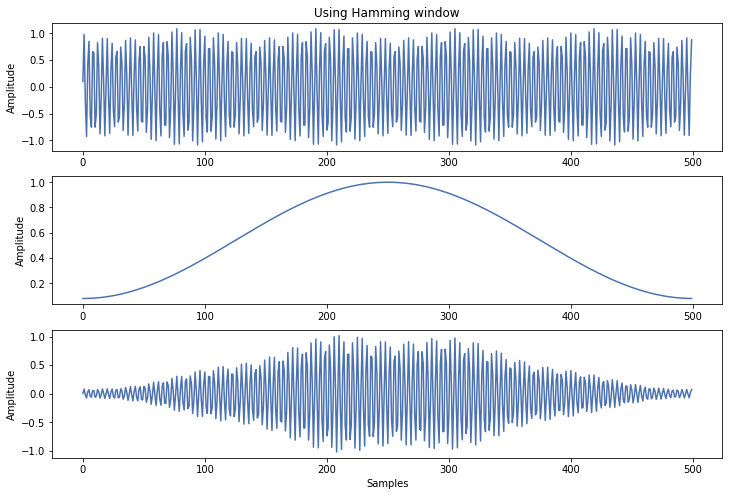

In [22]:
plt.figure(figsize = (12,8))
plt.subplot(3,1,1)
plt.plot(data)
plt.title("Using Hamming window")
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(ham)
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(window)
plt.ylabel('Amplitude')
plt.xlabel('Samples')

In [23]:
dft = np.abs(np.fft.fft(window))/500
N = np.arange(0,500)

Peaks : [132 136 364 368]


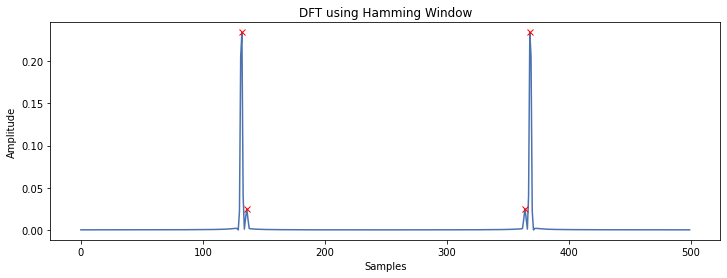

In [24]:
plt.figure(figsize = (12,4))
peak, _= sp.find_peaks(dft,threshold = 0.001)
plt.plot(N,dft)
plt.plot(N[peak],dft[peak],'rx')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("DFT using Hamming Window")

print("Peaks :",peak)

Peaks : [132 136 364 368]


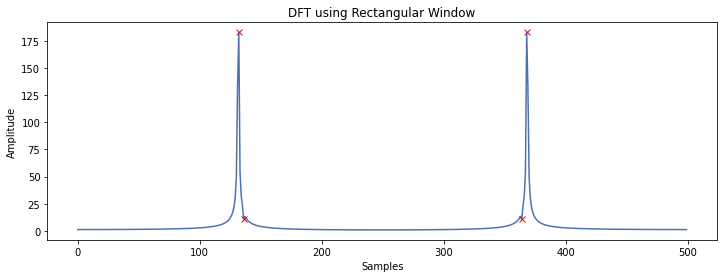

In [25]:
dft_box = np.abs(np.fft.fft(file))

plt.figure(figsize = (12,4))
peak, _= sp.find_peaks(dft,threshold = 0.01)
plt.plot(N,dft_box)
plt.plot(N[peak],dft_box[peak],'rx')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("DFT using Rectangular Window")

print("Peaks :",peak)